<a href="https://colab.research.google.com/github/stuti230901/Intrusion-detection-system/blob/main/minorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Libraries imported

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,pairwise
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn import preprocessing

Mounting the drive and importing the dataset in the form of multiple csvFiles

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

KeyboardInterrupt: ignored

In [ ]:
# import necessary libraries
import pandas as pd
import os
import glob


# use glob to get all the csv files
# in the folder
path = '/content/drive/MyDrive/MinorProjectDataset'
csv_files = glob.glob(os.path.join(path, "*.csv"))


# loop over the list of csv files
frames = []
for f in csv_files:

	# read the csv file
	df1 = pd.read_csv(f)
	# print the content
	frames.append(df1)

df = pd.concat(frames)


Pandas Dataframe

In [ ]:
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,Flow Duration,BwdPSHFlags,FwdIATMin
0,49188,4.0,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
1,49188,1.0,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
2,49188,1.0,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
3,49188,1.0,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
4,49486,3.0,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61.0,1,1,6,6,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
225741,61378,72.0,1,1,6,6,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
225742,61375,75.0,1,1,6,6,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
225743,61323,48.0,2,0,12,0,6,6,6.0,0.0,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN


In [ ]:
#Count of all the attacks in the given Dataset
df.Label.value_counts()

BENIGN              2273097
DoS Hulk             231073
PortScan             158930
DoS                  128027
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
WebAttack              2180
Bot                    1966
Infiltration             36
Heartbleed               11
Name: Label, dtype: int64

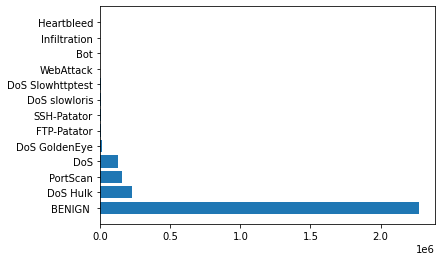

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

y = np.array(df['Label'].value_counts())
mylabels = ["BENIGN ", "DoS Hulk", "PortScan", "DoS","DoS GoldenEye","FTP-Patator","SSH-Patator","DoS slowloris","DoS Slowhttptest","WebAttack","Bot","Infiltration","Heartbleed"]
plt.barh(mylabels,y)
plt.show()

In [ ]:
#total number of Attributes
len(df. columns)

82

Creating a sample

In [ ]:
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')|(df['Label']=='Heartbleed')|(df['Label']=='DoS Slowhttptest')|(df['Label']=='DoS slowloris') |(df['Label']=='SSH-Patator') |(df['Label']=='FTP-Patator')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
#Here sample created of 10 % of the total number of length of number of data frames.
df_DoS = df[(df['Label']=='DoS Hulk') | (df['Label']=='Dos')] #| (df['Label'=='DoS GoldenEye'])]
#here 10%
df_DoS = df_DoS.sample(n=None, frac=0.1, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
#here 10%
df_PortScan = df_PortScan.sample(n=None, frac=0.1, replace=False, weights=None, random_state=None, axis=0)




In [ ]:
# Here making a sample which contains the above created samples and have a decent distribution of attacks in it
df_s = df_BENIGN.append(df_DoS).append(df_PortScan).append(df_minor)

In [ ]:
df_s

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,Flow Duration,BwdPSHFlags,FwdIATMin
25419,53,33175.0,2,2,74,186,37,37,37.000000,0.000000,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
29830,443,34621651.0,14,9,922,5609,437,0,65.857143,130.276544,...,179087,179087,34442542.0,0.0,34442542,34442542,BENIGN,NaN,NaN,NaN
616415,47959,3.0,2,0,12,0,6,6,6.000000,0.000000,...,0,0,0.0,0.0,0,0,BENIGN,NaN,0.0,NaN
380816,50499,NaN,1,1,187,0,187,187,187.000000,0.000000,...,0,0,0.0,0.0,0,0,BENIGN,90.0,NaN,NaN
481279,443,4006020.0,2,0,12,0,6,6,6.000000,0.000000,...,0,0,0.0,0.0,0,0,BENIGN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92885,80,5005388.0,5,3,599,2021,599,0,119.800000,267.880944,...,0,0,0.0,0.0,0,0,WebAttack,NaN,NaN,4.0
92984,80,5016759.0,5,5,599,4149,599,0,119.800000,267.880944,...,0,0,0.0,0.0,0,0,WebAttack,NaN,NaN,4.0
93233,80,5009163.0,4,4,599,2021,599,0,149.750000,299.500000,...,0,0,0.0,0.0,0,0,WebAttack,NaN,NaN,343.0
93242,80,73.0,1,1,0,0,0,0,0.000000,0.000000,...,0,0,0.0,0.0,0,0,WebAttack,NaN,NaN,0.0


In [ ]:
#df_s.Label == Series
df_s.Label.value_counts()

DoS Hulk            23107
BENIGN              22731
PortScan            15893
FTP-Patator          7938
SSH-Patator          5897
DoS slowloris        5796
DoS Slowhttptest     5499
WebAttack            2180
Bot                  1966
Infiltration           36
Heartbleed             11
Name: Label, dtype: int64

In [ ]:
# Pandas dataframe.sort_index() function sorts objects by labels along the given axis.
df_s = df_s.sort_index()

In [ ]:
# Save the sampled dataset
df_s.to_csv('Sample.csv',index=0)

In [ ]:
df = pd.read_csv('Sample.csv')
#dataframe created after the above sampling
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,Flow Duration,BwdPSHFlags,FwdIATMin
0,389,77033.0,13,11,4122,1038,1660,0,317.076923,600.681899,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
1,55575,76.0,1,1,6,6,6,6,6.000000,0.000000,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
2,80,NaN,6,4,293,384,292,0,48.833333,119.127523,...,114131,114131,9989850.0,0.0,9989850,9989850,BENIGN,10637980.0,NaN,NaN
3,88,1089.0,9,6,3150,3152,1575,0,350.000000,694.509719,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
4,55551,3.0,2,0,37,0,31,6,18.500000,17.677670,...,0,0,0.0,0.0,0,0,BENIGN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91049,50238,4.0,2,0,12,0,6,6,6.000000,0.000000,...,0,0,0.0,0.0,0,0,BENIGN,NaN,0.0,NaN
91050,53,193.0,2,2,82,254,41,41,41.000000,0.000000,...,0,0,0.0,0.0,0,0,BENIGN,NaN,0.0,NaN
91051,53,49079.0,2,2,66,98,33,33,33.000000,0.000000,...,0,0,0.0,0.0,0,0,BENIGN,NaN,0.0,NaN
91052,46098,57.0,2,1,31,6,31,0,15.500000,21.920310,...,0,0,0.0,0.0,0,0,BENIGN,NaN,0.0,NaN


In [ ]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label,Flow Duration,BwdPSHFlags,FwdIATMin
0,0.837329,8.616711e-06,0.000181,0.000000,0.000004,0.000000,0.000257,0.003026,0.001010,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.000000,0.0,0.0
1,0.000809,1.600008e-06,0.000181,0.000362,0.000029,0.000019,0.001755,0.020676,0.006901,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.000000,0.0,0.0
2,0.006760,0.000000e+00,0.012858,0.021538,0.000781,0.019088,0.026241,0.000000,0.005232,0.015298,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.023593,0.0,0.0
3,0.001343,5.558362e-06,0.001087,0.000724,0.000981,0.000358,0.059803,0.000000,0.067619,0.096449,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.000000,0.0,0.0
4,0.007096,3.353903e-02,0.003260,0.004706,0.000478,0.000597,0.016182,0.000000,0.012137,0.012265,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91049,0.751919,3.250017e-07,0.000000,0.000181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.000000,0.0,0.0
91050,0.000809,1.424841e-03,0.000181,0.000362,0.000027,0.000030,0.001670,0.019667,0.006565,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.000000,0.0,0.0
91051,0.000809,1.997010e-04,0.000181,0.000362,0.000024,0.000013,0.001455,0.017146,0.005723,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.000000,0.0,0.0
91052,0.738216,4.083354e-07,0.000000,0.000181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.000000,0.0,0.0


Splitting the Dataset into Training and Testing Data

In [ ]:
#Splitting data into Training and Testing data
# converting the labels into a numeric form = Label encoding
labelencoder = preprocessing.LabelEncoder()
#Fit label encoder and return encoded labels.
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
# The drop() method removes the specified row or column
X = df.drop(['Label'],axis=1).values
# for reshape it to have two dimensions
y = df.iloc[:, -4].values.reshape(-1,1)
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(72843, 81)

In [ ]:
#afte sampling
pd.Series(y_train).value_counts()

DoS Hulk            18425
BENIGN              18225
PortScan            12674
FTP-Patator          6359
SSH-Patator          4736
DoS slowloris        4661
DoS Slowhttptest     4408
WebAttack            1759
Bot                  1558
Infiltration           30
Heartbleed              8
dtype: int64

Machine learning model training

The four Models are:
1. Decision tree
2. Random forest
3. Extra trees
4. XGBoost

In [ ]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
#training model
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
dt_precision,dt_recall,dt_fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(dt_precision)))
print('Recall of DT: '+(str(dt_recall)))
print('F1-score of DT: '+(str(dt_fscore)))


Accuracy of DT: 0.997583877876009
Precision of DT: 0.997533232137446
Recall of DT: 0.997583877876009
F1-score of DT: 0.9975574004791313


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
rf_precision,rf_recall,rf_fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(rf_precision)))
print('Recall of RF: '+(str(rf_recall)))
print('F1-score of RF: '+(str(rf_fscore)))
#print(classification_report(y_true,y_predict))

Accuracy of RF: 0.9982977321399155
Precision of RF: 0.9982986882596747
Recall of RF: 0.9982977321399155
F1-score of RF: 0.9982878586934167


In [ ]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
et_precision,et_recall,et_fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(et_precision)))
print('Recall of ET: '+(str(et_recall)))
print('F1-score of ET: '+(str(et_fscore)))
#print(classification_report(y_true,y_predict))

Accuracy of ET: 0.997419142276646
Precision of ET: 0.9973672354990746
Recall of ET: 0.997419142276646
F1-score of ET: 0.9973830793918983


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
xg_precision,xg_recall,xg_fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(xg_precision)))
print('Recall of XGBoost: '+(str(xg_recall)))
print('F1-score of XGBoost: '+(str(xg_fscore)))

#print(classification_report(y_true,y_predict))

Accuracy of XGBoost: 0.973093185437373
Precision of XGBoost: 0.9735675200276098
Recall of XGBoost: 0.973093185437373
F1-score of XGBoost: 0.9717399410798592


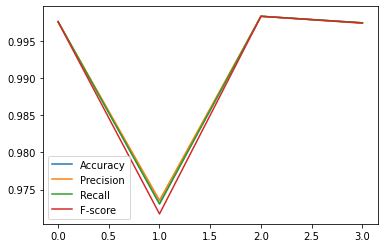

In [ ]:
import matplotlib.pyplot as plt
import math
ar = [dt_score,xg_score,rf_score,et_score]
pre = [dt_precision,xg_precision,rf_precision,et_precision]
rec = [dt_recall,xg_recall,rf_recall,et_recall]
fsc = [dt_fscore,xg_fscore,rf_fscore,et_fscore]
# mylabels1 = ['Decision Tree','Randon Forest','Extra Trees','XGBoost']
# plt.xlabel('Algorithm')
# plt.ylabel('Accuracy')
# plt.plot(mylabels1,ar)
# pp.show()

plt . plot (ar, label = "Accuracy" )
plt . plot (pre, label = "Precision" )
plt . plot (rec, label = "Recall" )
plt . plot (fsc, label = "F-score")
plt . legend ( loc = "lower left" )
plt . show ()

The respective Accuracies are:
1. Decision tree : 99.77 %
2. Random Forest : 99.74%
3. Extra Trees : 99.71 %
4. XGBoost : 97.81 %